<a href="https://colab.research.google.com/github/jerem00/test_esme/blob/main/tp2_Valensi_SainteRose_MalletGuy_Gadre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn.svm import SVC
from sklearn import svm


from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.neighbors import KNeighborsClassifier

from google.colab import files

In [2]:
files.upload()


Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [5]:
data = pd.read_csv('heart.csv', delimiter=',')

In [6]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
"check null values"
b = data.isnull().sum()
print(b)

"check missing values"
b = data.isnull().sum().sum()
print(b)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
0


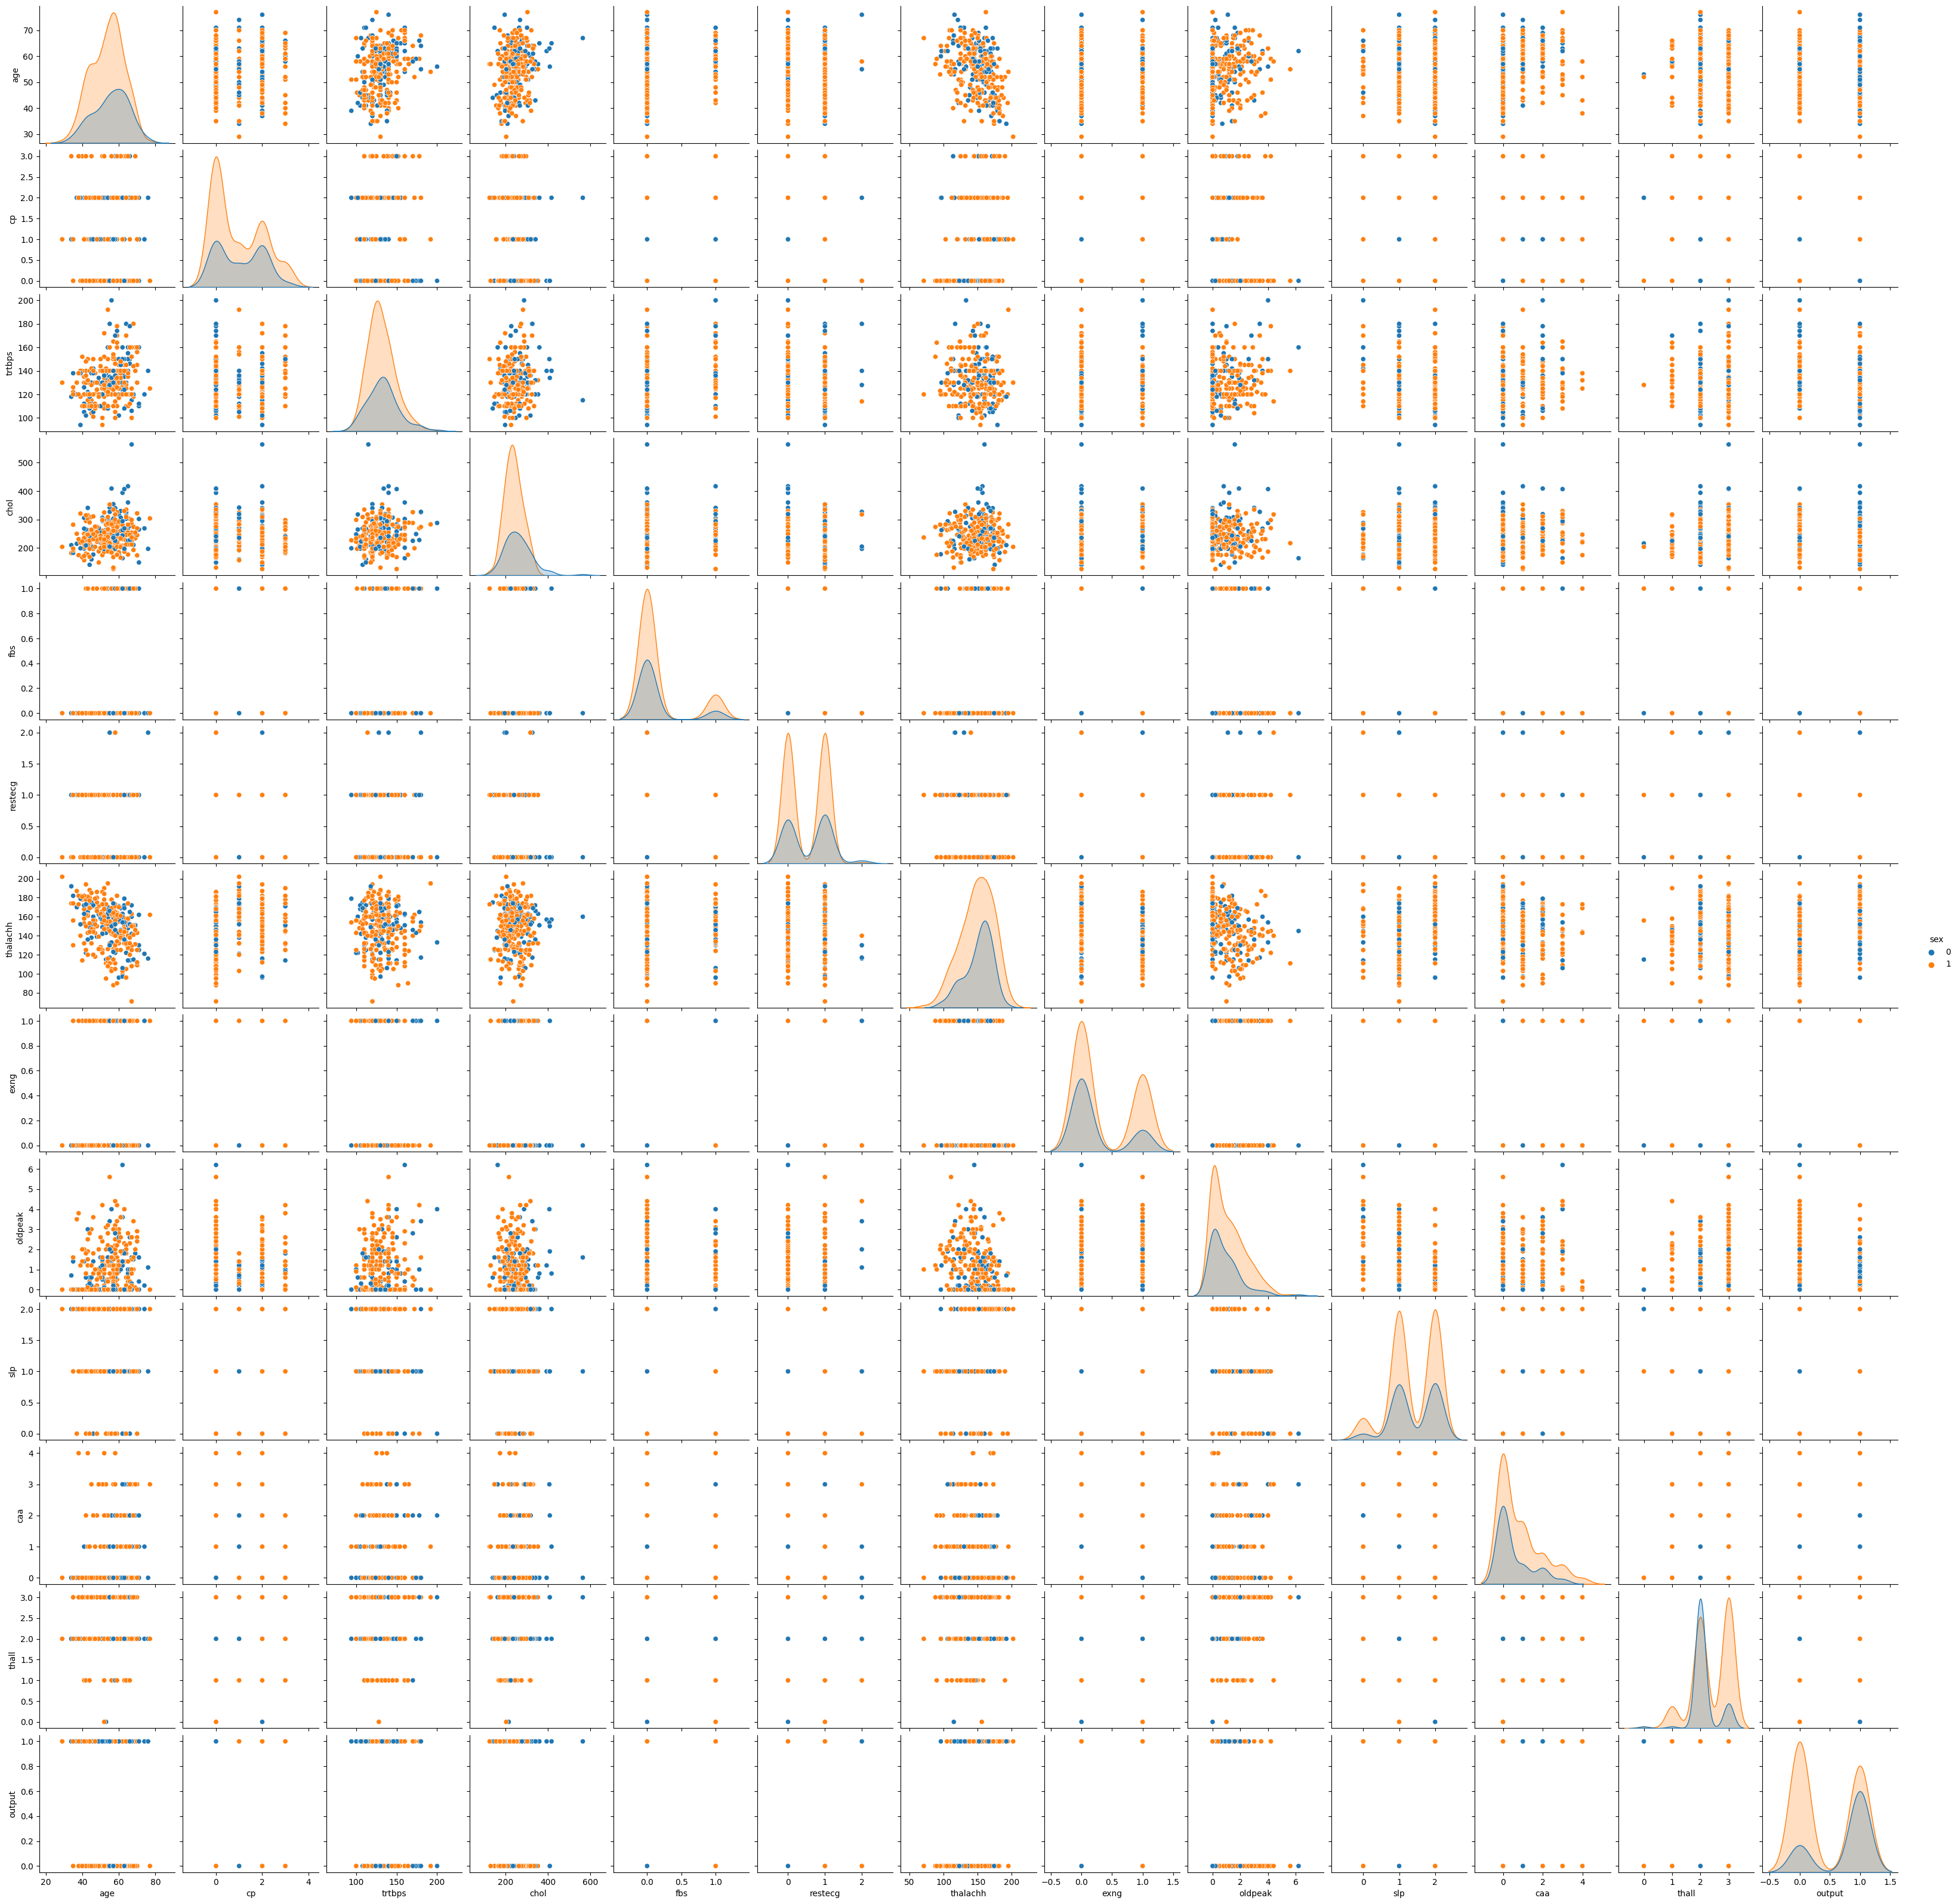

In [9]:
sns.pairplot(data,hue="sex")

In [10]:
"correlation"
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

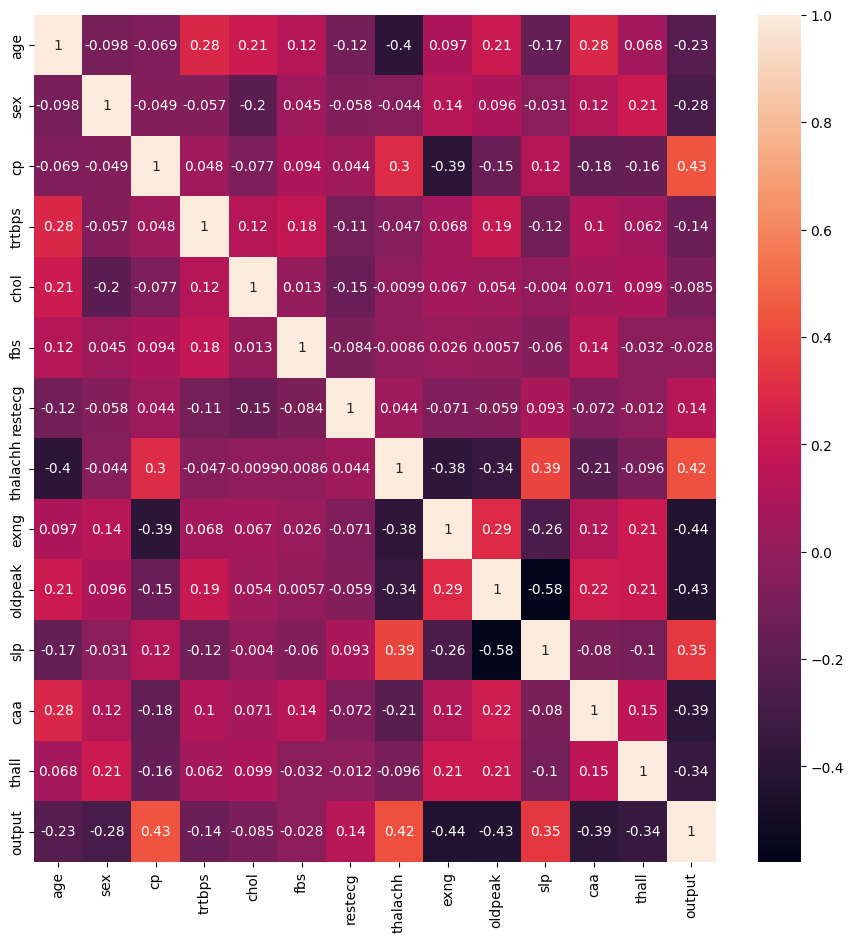

In [13]:
"lets vizualize the correlation"
fig, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(data.corr(), ax=ax, annot=True)

In [64]:
from sklearn.datasets import make_classification

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a polynomial kernel and a C value of 10
clf = svm.SVC(kernel='poly', C=10)
clf.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [65]:
# Create an instance of SVM classifier
svm_classifier = SVC()

# Define a grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf']}

# Create a grid search object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Score: ", grid_search.best_score_)
print("Test Score: ", grid_search.score(X_test, y_test))

Best Hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Training Score:  0.925
Test Score:  0.945


<ipython-input-66-2b327ab8cbf0>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')


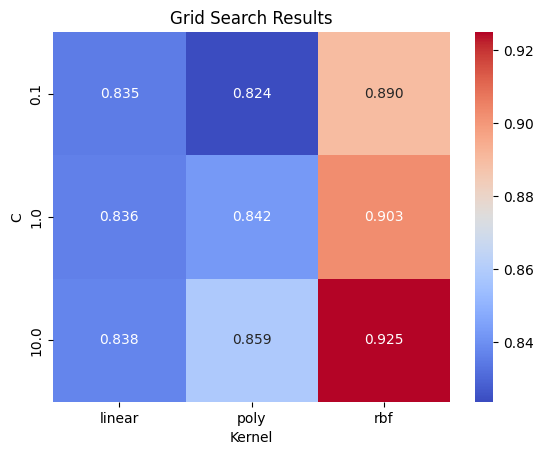

In [66]:
results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Grid Search Results')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()

In [32]:
# Split the dataset into features and labels
X = data.drop('output', axis = 1)
y = data['output']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create an SVM classifier with default parameters
svm_classifier = SVC(kernel='poly', C=10)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

In [62]:
# Compute the confusion matrix for the SVM model
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
{'C': 100, 'kernel': 'linear'}


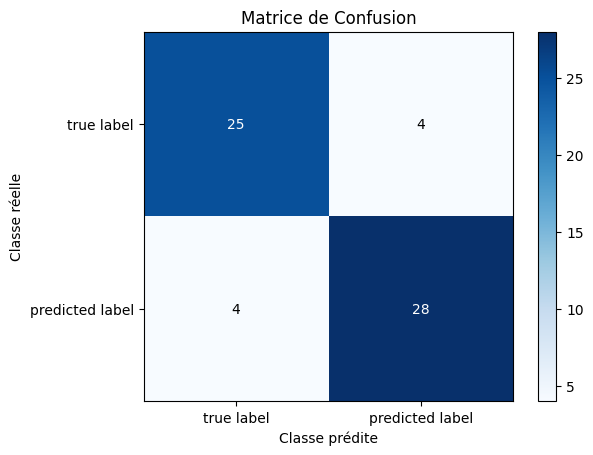

In [49]:
# Affichage de la matrice de confusion
labels = ['true label', 'predicted label']  # Étiquettes de classe
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Matrice de Confusion',
       ylabel='Classe réelle',
       xlabel='Classe prédite')

# Écrire les valeurs dans la matrice de confusion
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Make predictions on the testing data using the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Compute the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
print(cm)

{'C': 100, 'kernel': 'linear'}
[[26  3]
 [ 5 27]]


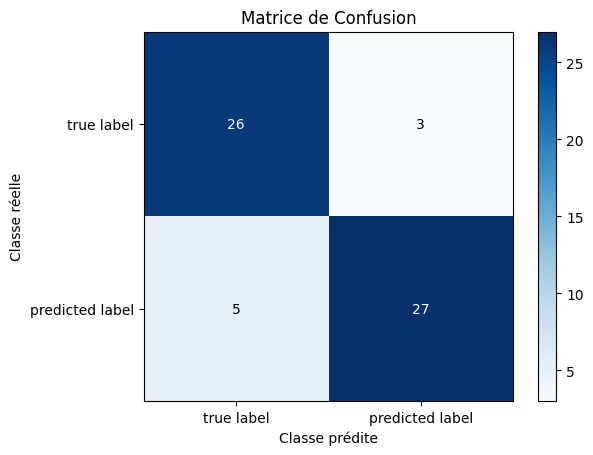

In [53]:
# Affichage de la matrice de confusion
labels = ['true label', 'predicted label']  # Étiquettes de classe
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Matrice de Confusion',
       ylabel='Classe réelle',
       xlabel='Classe prédite')

# Écrire les valeurs dans la matrice de confusion
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

# Make predictions on the testing data using the best model
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Compute the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
print(cm)

{'kernel': 'linear', 'C': 1.0}
[[25  4]
 [ 4 28]]


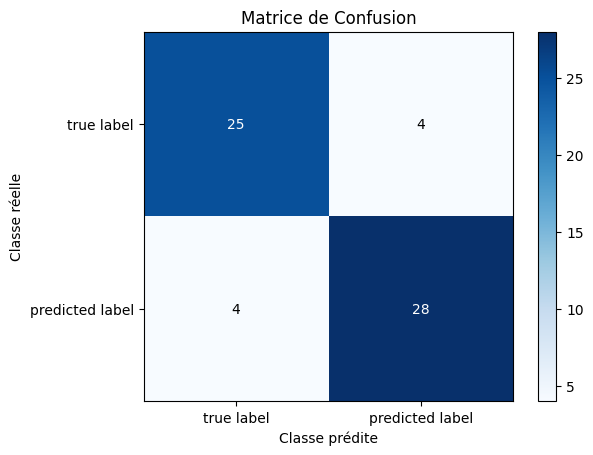

In [55]:
# Affichage de la matrice de confusion
labels = ['true label', 'predicted label']  # Étiquettes de classe
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Matrice de Confusion',
       ylabel='Classe réelle',
       xlabel='Classe prédite')

# Écrire les valeurs dans la matrice de confusion
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def train_model_with_grid_search(model, X_train, y_train, param_grid, cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def train_model_with_random_search(model, X_train, y_train, param_distributions, cv=5, n_iter=10):
    random_search = RandomizedSearchCV(model, param_distributions, cv=cv, n_iter=n_iter)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

models_with_parameters = {
    svm.SVC(): {'C': [0.1, 1, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance']}
}


def train_models_with_parameters(models_with_parameters, X_train, y_train, search_type='grid', cv=5, n_iter=10):
    trained_models = {}
    for model, params in models_with_parameters.items():
        if search_type == 'grid':
            trained_model = train_model_with_grid_search(model, X_train, y_train, params, cv=cv)
        elif search_type == 'random':
            trained_model = train_model_with_random_search(model, X_train, y_train, params, cv=cv, n_iter=n_iter)
        trained_models[model.__class__.__name__] = trained_model
    return trained_models


In [70]:
    print(train_models_with_parameters(models_with_parameters, X_train, y_train, search_type='grid', cv=5, n_iter=10))    


{'SVC': SVC(C=100), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=7, weights='distance')}
{'SVC': SVC(C=100), 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=7, weights='distance')}
